In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

MODEL_SLUG = "DMC-1200m-shortTest-06-12-2023_23:43"

FILE_PATH = f"./logs/{MODEL_SLUG}.csv"
episodes = pd.read_csv(FILE_PATH)

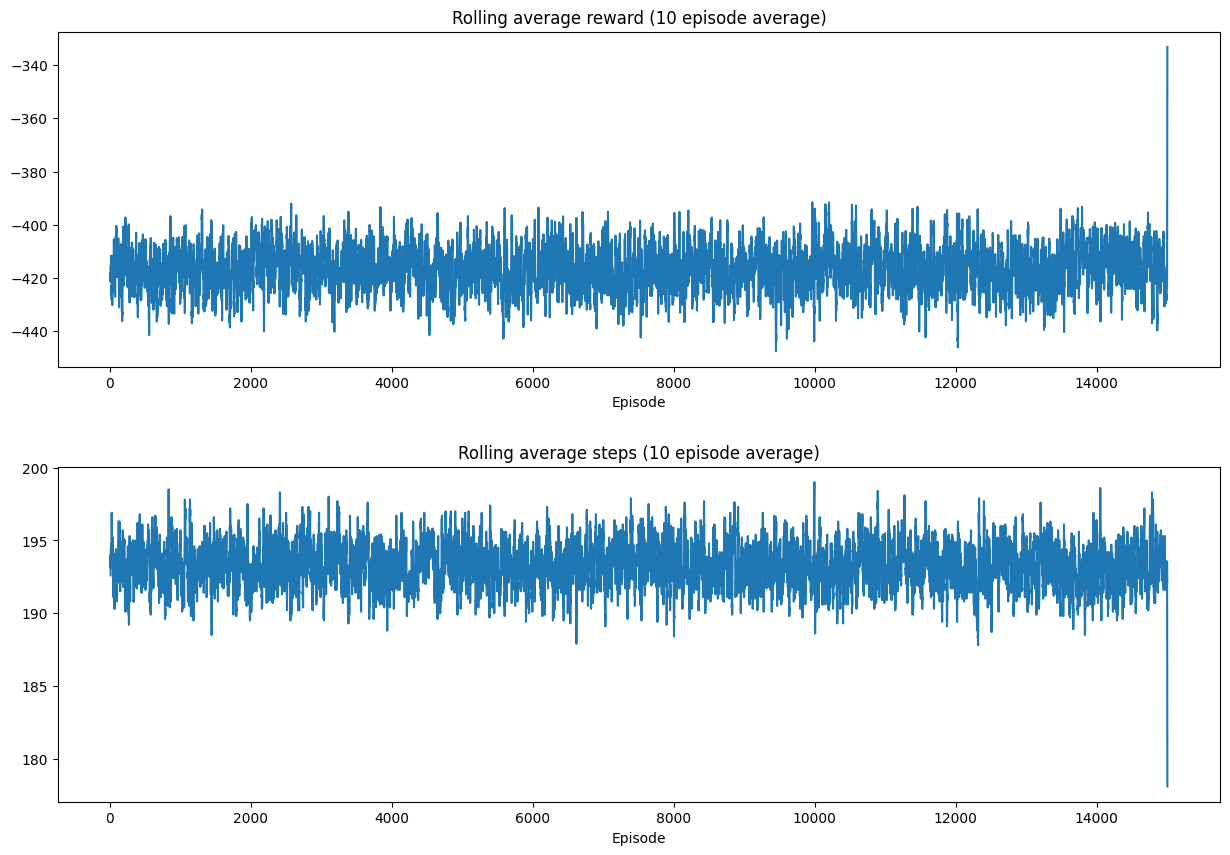

In [304]:
plt.rcParams['figure.figsize'] = [15, 10]

fig, axs = plt.subplots(2, 1)

rolling_average = 10

# Create a rolling average of the total reward per episode
episodes['rolling_reward'] = episodes['reward'].rolling(rolling_average).mean()

axs[0].plot(episodes['episode'], episodes['rolling_reward'])
axs[0].set_title(f'Rolling average reward ({rolling_average} episode average)')
axs[0].set_xlabel('Episode')

# ---------------------------------------------

episodes['rolling_steps'] = episodes['steps'].rolling(rolling_average).mean()

axs[1].plot(episodes['episode'], episodes['rolling_steps'])
axs[1].set_title(f'Rolling average steps ({rolling_average} episode average)')
axs[1].set_xlabel('Episode')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.3)
